# Project 02: Titanic Data Preprocessing & Modeling

This notebook performs:
1.Initial Exploration
2.Data Cleaning
3.Feature Engineering
4.Categorical Encoding
5.Outlier Handling

- Exploratory Data Analysis
- Data cleaning
- Feature engineering
- Categorical encoding
- Outlier detection and handling
- Machine learning modeling


# 1.Exploratory Data Analysis 

In [1]:
#import the librairies 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(
    context='notebook',    # Scale of plot elements
    style='darkgrid',      # Background style
    palette='icefire',    # Color palette
    font='sans-serif',     # Font family
    font_scale=1.0,        # Font size multiplier
    rc=None                # Additional matplotlib parameters
)

In [2]:
#load the titanic data 
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
#basic info and description 
df.info()
df.describe(include="all")
df.dtypes
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

# Dataset Overview : 

Shape: 891 passengers × 15 features

## Missing Values
- age: 177 missing (19.9%)
- deck: 688 missing (77.2%) - consider dropping
- embarked: 2 missing (0.2%)

## Target Variable (Survived)
- Survival rate: 38.4% (342 survived, 549 died)
- Imbalanced dataset

## Passenger Demographics
- Age: Mean 29.7 years (range: 0.42 - 80 years)
- Gender: 65% male, 35% female
- Class: 55% Third class, 24% Second, 21% First
- Traveling alone: 60% of passengers

## Notable Observations
- Most embarked from Southampton (72%)
- Fare prices highly skewed (median $14.45, max $512.33)
- Majority were lower-class passengers



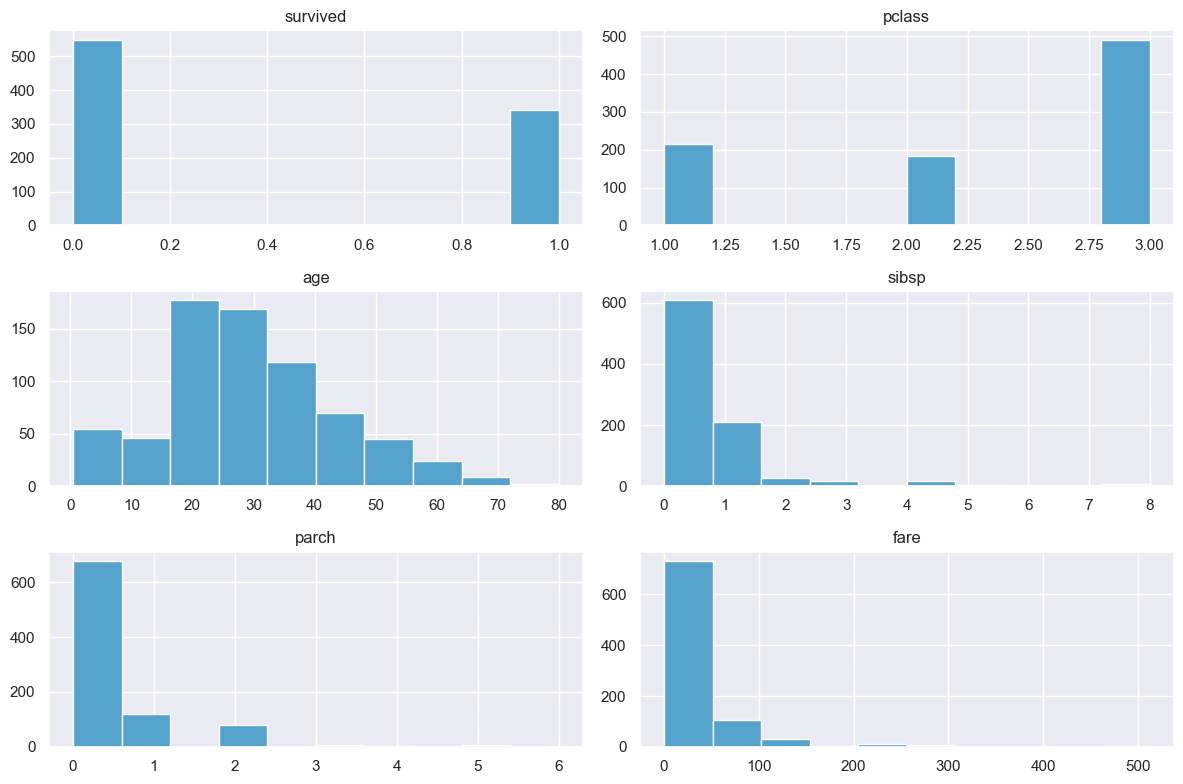

In [4]:
#Distributions of Numerical Features

df.select_dtypes(include=['float64', 'int64']).hist(figsize=(12,8))
plt.tight_layout()
plt.show()


## Explanation
### **survived**
Shows two bars: one for "died" (0) and one for "survived" (1).
- The "died" bar is taller = more people died than survived
- Quick visual of the tragedy

### **pclass** 
Shows three bars for 1st, 2nd, and 3rd class.
- The 3rd class bar is tallest = most passengers were poor (3rd class)
- Fewer rich people (1st class)

### **age**
Shows a mountain-like shape.
- Most passengers were between 20-40 years old (the peak)
- Fewer very young children and elderly people
- This is the "normal" age distribution you'd expect

### **sibsp/parch** (family members)
Shows one very tall bar at zero, then tiny bars.
- Most people traveled alone or with just 1 family member
- Very few had large families aboard
- The chart is "pushed to the left"

### **fare** (ticket price)
Shows one giant bar on the left, then almost nothing.
- Most tickets were cheap (under $50)
- A few crazy expensive tickets (200-500+)
- This shows the gap between rich and poor passengers


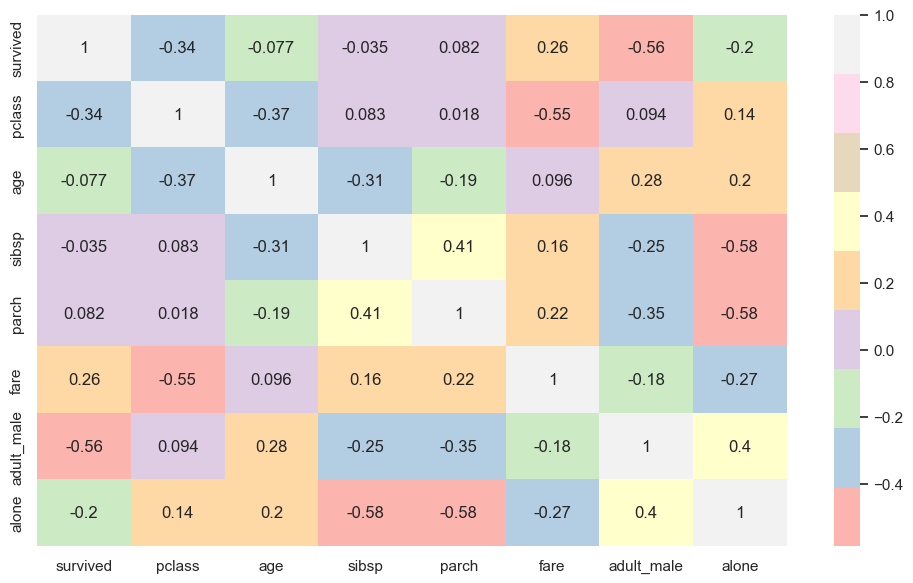

In [5]:
#Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True , cmap='Pastel1' )
plt.tight_layout()
plt.show()

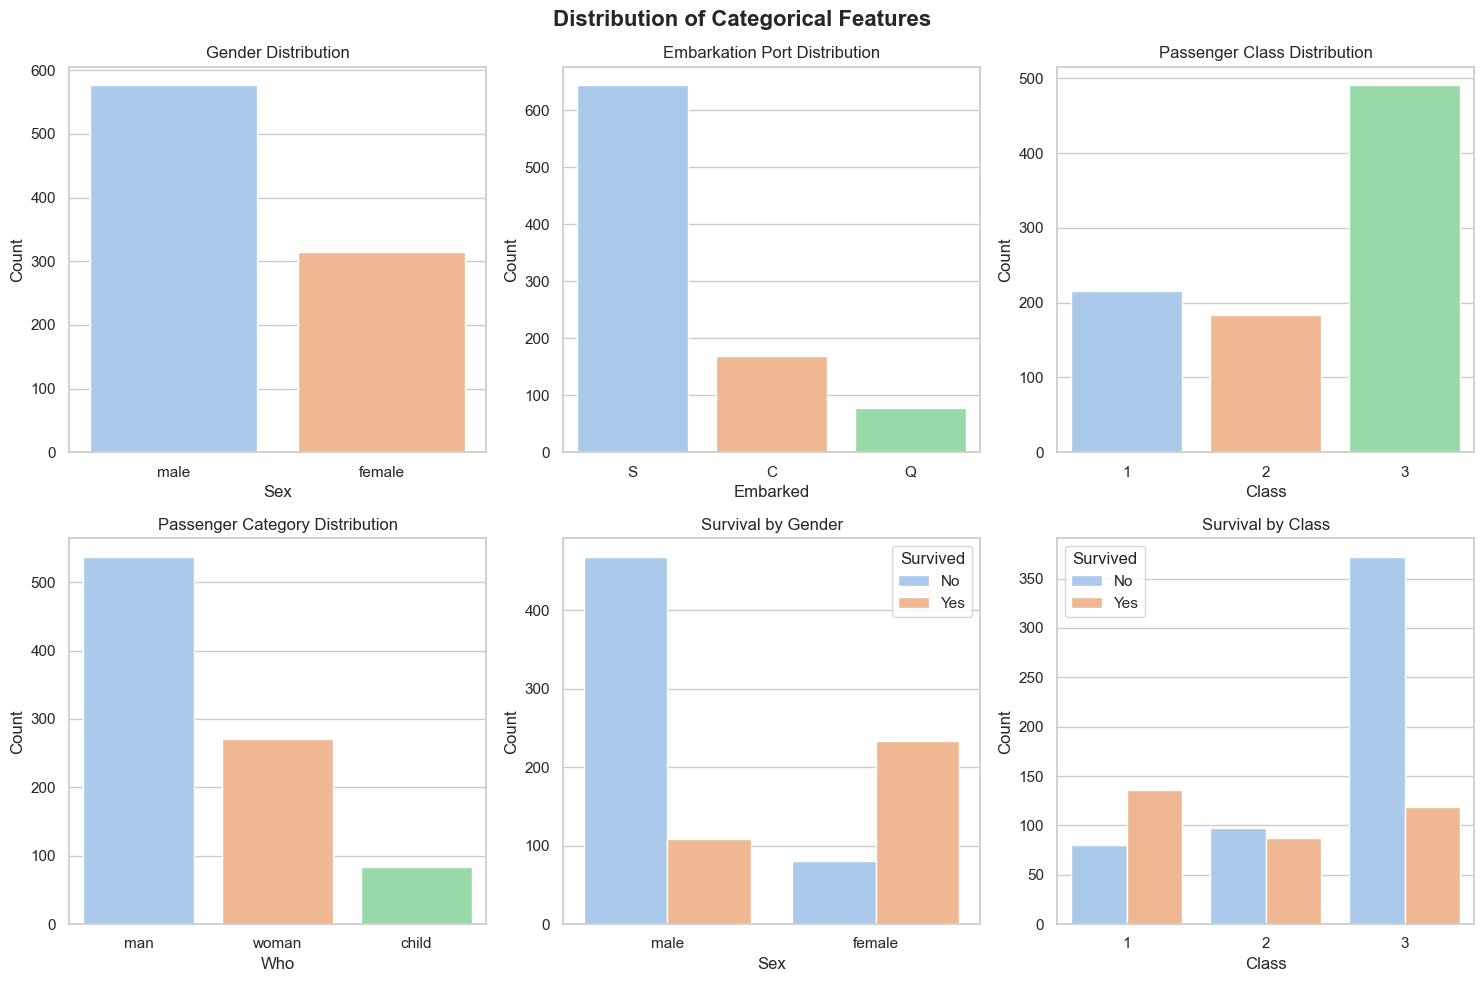

In [6]:

# Set style
sns.set_theme(style='whitegrid')

# Create subplots for categorical features
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Distribution of Categorical Features', fontsize=16, fontweight='bold')

# 1. Sex distribution
sns.countplot(data=df, x='sex', hue='sex', ax=axes[0, 0], palette='pastel', legend=False)
axes[0, 0].set_title('Gender Distribution')
axes[0, 0].set_xlabel('Sex')
axes[0, 0].set_ylabel('Count')

# 2. Embarked distribution
sns.countplot(data=df, x='embarked', hue='embarked', ax=axes[0, 1], palette='pastel', legend=False)
axes[0, 1].set_title('Embarkation Port Distribution')
axes[0, 1].set_xlabel('Embarked')
axes[0, 1].set_ylabel('Count')

# 3. Pclass distribution
sns.countplot(data=df, x='pclass', hue='pclass', ax=axes[0, 2], palette='pastel', legend=False)
axes[0, 2].set_title('Passenger Class Distribution')
axes[0, 2].set_xlabel('Class')
axes[0, 2].set_ylabel('Count')

# 4. Who distribution
sns.countplot(data=df, x='who', hue='who', ax=axes[1, 0], palette='pastel', legend=False)
axes[1, 0].set_title('Passenger Category Distribution')
axes[1, 0].set_xlabel('Who')
axes[1, 0].set_ylabel('Count')

# 5. Survival by Sex
sns.countplot(data=df, x='sex', hue='survived', ax=axes[1, 1], palette='pastel')
axes[1, 1].set_title('Survival by Gender')
axes[1, 1].set_xlabel('Sex')
axes[1, 1].set_ylabel('Count')
axes[1, 1].legend(title='Survived', labels=['No', 'Yes'])

# 6. Survival by Class
sns.countplot(data=df, x='pclass', hue='survived', ax=axes[1, 2], palette='pastel')
axes[1, 2].set_title('Survival by Class')
axes[1, 2].set_xlabel('Class')
axes[1, 2].set_ylabel('Count')
axes[1, 2].legend(title='Survived', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

## Feature Correlation with Survival

### Numerical Features
- Fare: Positive correlation - Higher fares linked to better survival
- Pclass: Negative correlation - Lower class passengers had lower survival rates
- Age: Weak correlation - Minimal direct impact
- Family size (sibsp, parch): Small positive correlation

### Categorical Features (when encoded)
- Sex: Strong predictor (females survived more)
- Embarked: Moderate effect (port C had higher survival)
- Alone: Traveling alone reduced survival chances



# 2.DATA CLEANING 

In [7]:
df.drop_duplicates(inplace=True)

# Drop columns no interessting
df = df.drop(columns=["deck", "embark_town", "alive", "class", "who"], errors="ignore")

# Fill missing values
df["age"] = df["age"].fillna(df["age"].median())
df["embarked"] = df["embarked"].fillna(df["embarked"].mode()[0])
df["fare"] = df["fare"].fillna(df["fare"].median())


# 3. Feature Engineering

In [8]:
df["FamilySize"] = df["sibsp"] + df["parch"] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
print (df.columns )

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'adult_male', 'alone', 'FamilySize', 'IsAlone'],
      dtype='object')


# 4. Categorical Encoding


In [9]:
df = pd.get_dummies(df, drop_first=True)
df.head()


,survived,pclass,age,sibsp,parch,fare,adult_male,alone,FamilySize,IsAlone,sex_male,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,True,False,2,0,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,2,0,False,False,False
2,1,3,26.0,0,0,7.9250,False,True,1,1,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,2,0,False,False,True
4,0,3,35.0,0,0,8.0500,True,True,1,1,True,False,True


# 5. Outlier Handling IQR


In [10]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

df = remove_outliers_iqr(df, "fare")
df = remove_outliers_iqr(df, "age")


# 6. Scalling and Normalisation 

In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler



# Sélection des colonnes numériques
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Créer une copie pour scaling
X_scaled = df.copy()

# Choisir le scaler
scaler = StandardScaler()     # standardisation
# scaler = MinMaxScaler()     # normalisation min-max

# Appliquer le scaler
X_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])

X_scaled.head()


,survived,pclass,age,sibsp,parch,fare,adult_male,alone,FamilySize,IsAlone,sex_male,embarked_Q,embarked_S
0,-0.771142,0.733537,-0.480563,0.466630,-0.476142,-0.819060,True,False,0.050468,-1.216242,True,False,True
1,1.296778,-1.936456,0.873593,0.466630,-0.476142,3.537661,False,False,0.050468,-1.216242,False,False,False
2,1.296778,0.733537,-0.142024,-0.503547,-0.476142,-0.773134,False,True,-0.587175,0.822205,False,False,True
3,1.296778,-1.936456,0.619689,0.466630,-0.476142,2.300499,False,False,0.050468,-1.216242,False,False,True
4,-0.771142,0.733537,0.619689,-0.503547,-0.476142,-0.764629,True,True,-0.587175,0.822205,True,False,True


# 7. Train / Modeling 

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Séparation X / y
X = df.drop(columns=["survived"])
y = df["survived"]

# Découpage train / test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y 
)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X.columns)


# 1. LOGISTIC REGRESSION
log_model = LogisticRegression(max_iter=600)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)


# 2. KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

X_train.head()


,pclass,age,sibsp,parch,fare,adult_male,alone,FamilySize,IsAlone,sex_male,embarked_Q,embarked_S
0,-0.571178,0.919169,-0.510650,-0.478336,0.496381,0.819741,0.822992,-0.595398,0.822992,0.722315,-0.283279,0.564885
1,-1.892185,1.415712,-0.510650,-0.478336,1.170189,0.819741,0.822992,-0.595398,0.822992,0.722315,-0.283279,0.564885
2,0.749829,-0.901489,-0.510650,-0.478336,-0.322238,-1.219898,0.822992,-0.595398,0.822992,-1.384437,-0.283279,-1.770271
3,0.749829,0.029529,-0.510650,-0.478336,-0.319281,0.819741,0.822992,-0.595398,0.822992,0.722315,-0.283279,0.564885
4,-1.892185,0.753655,0.508708,-0.478336,2.418506,0.819741,-1.215078,0.084132,-1.215078,0.722315,-0.283279,0.564885


# 8. Evaluation 

In [13]:
print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

print("=== KNN ===")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))



=== Logistic Regression ===
Accuracy: 0.803030303030303
[[71 12]
 [14 35]]
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        83
           1       0.74      0.71      0.73        49

    accuracy                           0.80       132
   macro avg       0.79      0.78      0.79       132
weighted avg       0.80      0.80      0.80       132

=== KNN ===
Accuracy: 0.7954545454545454
[[73 10]
 [17 32]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        83
           1       0.76      0.65      0.70        49

    accuracy                           0.80       132
   macro avg       0.79      0.77      0.77       132
weighted avg       0.79      0.80      0.79       132

